In [7]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("precision", 2)

# Creating model object and indicating path
data_path = "../../../input/BES/dionisos_grid_v1.0.0/"
geo_model = gp.create_model("Dionisos_Grid_BES_v2")

In [8]:
%time
# Loading model, the extension, the resolution and importing the data 
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -10450, 0],
    resolution=[100, 100, 100],
    path_i=data_path + "surface_points_downscaled_v2.csv",
    path_o=data_path + "orientations_points_v2.csv",
    )

# Setting series for formations
gp.map_stack_to_surfaces(
    geo_model,
    {"Strat_Series": (
        'top_struct',
        'mid_struct',
        'low_struct',
        ),
     "Basement_series": (
         'basement',
         ),
     }
    )

# Interpolating the data
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
    )

# Compupting the model
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

# Creating voxel numbers
topo_init = tp.compute_topology(
    geo_model, 
    direction="x",
    voxel_threshold=1
)  #, direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 
    1, 
    topo_init[0], 
    topo_init[1]
)

Wall time: 0 ns
Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               230725.38
$C_o$            1267481011.9
drift equations        [3, 3]


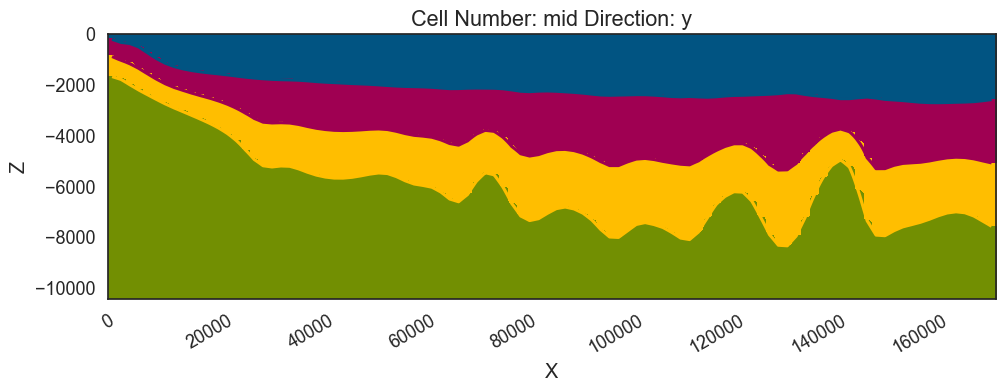

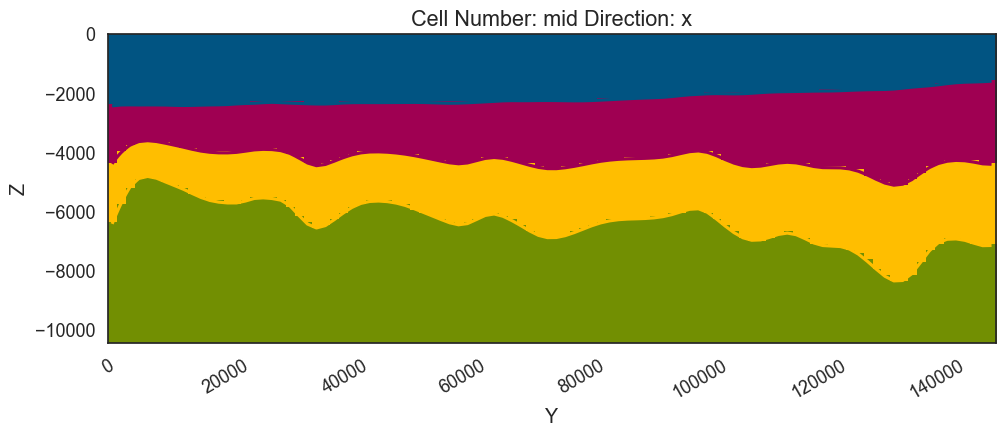

In [9]:
# 2D Plot
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=5,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

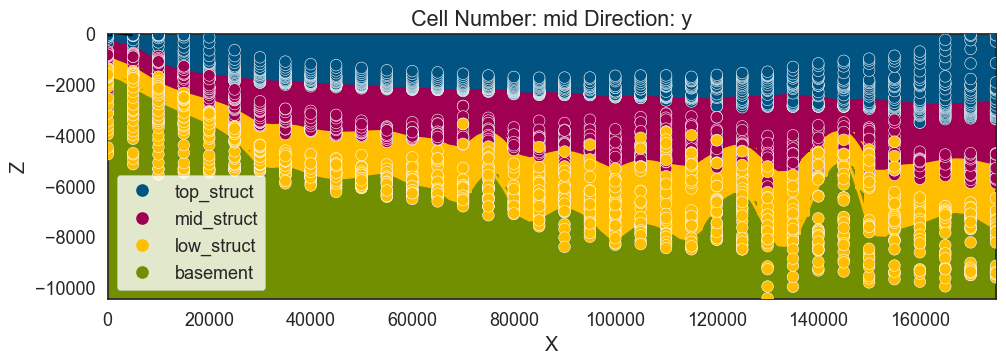

In [12]:
# 2D Plot
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=True,
    show_lith=True,
    ve=5,
)

In [14]:
# 3D Plot
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=10)

In [11]:
# Saving model
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)

True

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -10450, 0],
    resolution=[100, 100, 100],
    path_i=data_path + "surface_points_downscaled.csv",
    path_o=data_path + "orientations_points.csv",
)

Active grids: ['regular']


Dionisos_BES_v1.0.0  2023-08-09 11:49

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,top_formation,Default series,1,#015482,1
1,mid_formation,Default series,2,#9f0052,2
2,base_formation,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "top_formation",
            "mid_formation",
            "base_formation",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top_formation,Strat_Series,1,#015482,1
1,mid_formation,Strat_Series,2,#9f0052,2
2,base_formation,Strat_Series,3,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.get_data()

X       Y     Z    smooth         surface       G_x  \
surface_points 0          0       0 -1503  2.00e-06   top_formation       NaN   
               1       5000       0 -1574  2.00e-06   top_formation       NaN   
               2      10000       0 -1645  2.00e-06   top_formation       NaN   
               3      15000       0 -1720  2.00e-06   top_formation       NaN   
               4      20000       0 -1786  2.00e-06   top_formation       NaN   
...                     ...     ...   ...       ...             ...       ...   
               3344  160000  150000 -9021  2.00e-06  base_formation       NaN   
               3345  165000  150000 -8849  2.00e-06  base_formation       NaN   
               3346  170000  150000 -8979  2.00e-06  base_formation       NaN   
               3347  175000  150000 -9002  2.00e-06  base_formation       NaN   
orientations   0          0   75000   -73  1.00e-02   top_formation  1.00e-12   

                          G_y  G_z  
surface_points 0          NaN  NaN  
               1          NaN  NaN  
               2          NaN  NaN  
               3          NaN  NaN  
               4          NaN  NaN  
...                       ...  ...  
               3344       NaN  NaN  
               3345       NaN  NaN  
               3346       NaN  NaN  
               3347       NaN  NaN  
orientations   0     1.00e-12  1.0  

[3349 rows x 8 columns]

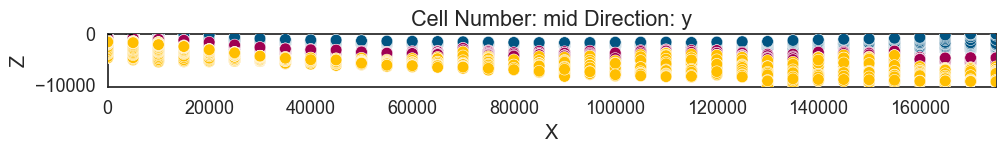

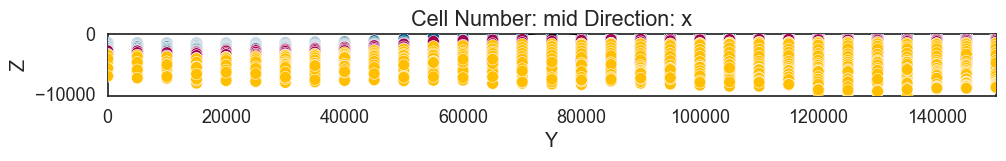

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [10]:
# geo_model.set_default_orientation()

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
)

In [8]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               230725.38
$C_o$            1267481011.9
drift equations        [3, 3]
Wall time: 20.5 s


In [9]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 8min 26s



Lithology ids 
  [4.         4.         4.         ... 1.99262569 1.92907193 1.55726348] 

In [11]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

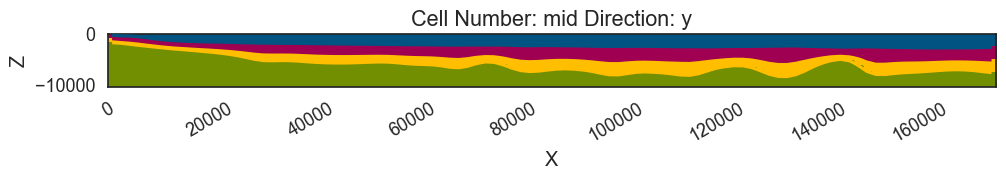

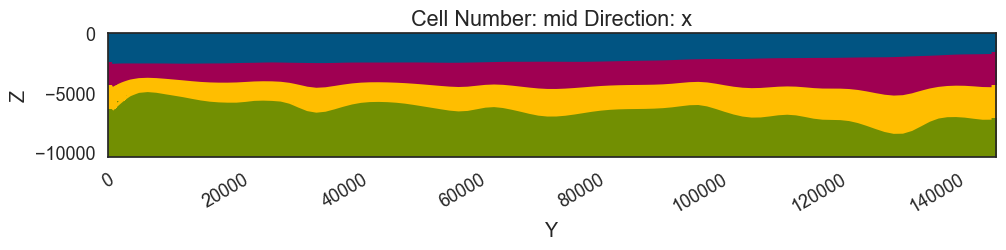

In [12]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

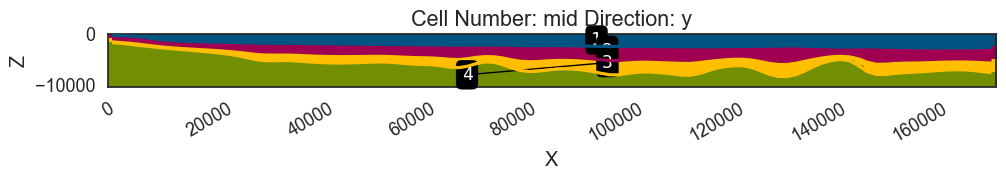

In [14]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [16]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False)

In [17]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)

True